# 6월 18일

In [1]:
import pandas as pd

In [61]:
data = pd.DataFrame({'Original' : [1,4,36,100,1000,10000]})
#data

In [62]:
import numpy as np

In [63]:
# 로그 변환
data['log Trans']= np.log1p(data['Original'])
#data

In [64]:
# 스퀘어루트 변환 
data['sqr Trans'] = np.sqrt(data['Original'])
#data

In [15]:
#설치 

#pip install scikit-learn

In [ ]:
# from sklearn에 있는 preprocessing을 사용 import 표준화, 정규화, 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder

In [66]:
data1 = pd.DataFrame({'Orignal':[50,80,90,100,160]})
data2 = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})

In [74]:
# 표준화 standard 함수 
scaler_1 = StandardScaler()
data1['scaler_1']  = scaler_1.fit_transform(data1[['Orignal']]) #2차원 형식으로 전달

# 정규화 minmax
scaler_2 = MinMaxScaler()
data1['scaler_2']  = scaler_2.fit_transform(data1[['Orignal']]) #2차원 형식으로 전달
data1

,Orignal,scaler_1,scaler_2
0,50,-1.273852,0.000000
1,80,-0.443079,0.272727
2,90,-0.166155,0.363636
3,100,0.110770,0.454545
4,160,1.772316,1.000000


In [78]:
# 레이블의 인코딩 
encoder_1 = LabelEncoder()
data2['Label Encoding'] = encoder_1.fit_transform(data2['Fruits'])
data2

,Fruits,Label Encoding,Label Encoding_0,Label Encoding_1,Label Encoding_2
0,사과,1,0.0,1.0,0.0
1,배,0,1.0,0.0,0.0
2,포도,2,0.0,0.0,1.0
3,사과,1,0.0,1.0,0.0
4,포도,2,0.0,0.0,1.0


In [69]:
#원핫인코딩
encoder_2 = OneHotEncoder(sparse_output=False)
onehot_encoded = encoder_2.fit_transform(data2[['Label Encoding']])


In [70]:
onehot_col = encoder_2.get_feature_names_out()
print(onehot_col)

['Label Encoding_0' 'Label Encoding_1' 'Label Encoding_2']


In [71]:
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_col)


In [72]:
data2 = pd.concat([data2, onehot_df],axis=1)
data2

,Fruits,Label Encoding,Label Encoding_0,Label Encoding_1,Label Encoding_2
0,사과,1,0.0,1.0,0.0
1,배,0,1.0,0.0,0.0
2,포도,2,0.0,0.0,1.0
3,사과,1,0.0,1.0,0.0
4,포도,2,0.0,0.0,1.0


# 데이터 마이닝 / 생성형 ai

In [ ]:
#내장 모듈  statistics
#최빈값이 여러개면 모듈에 있는 multimode를 이용.
# import statistics # 판다스 없이.



# 데이터 분포
- 데이터가 공간적으로 어떻게 퍼져 있는지를 나타낸다.
- 정규분포, 왜도, 첨도 (데이터의 분포 특성을 이해하는데 중요한 개념) 

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis


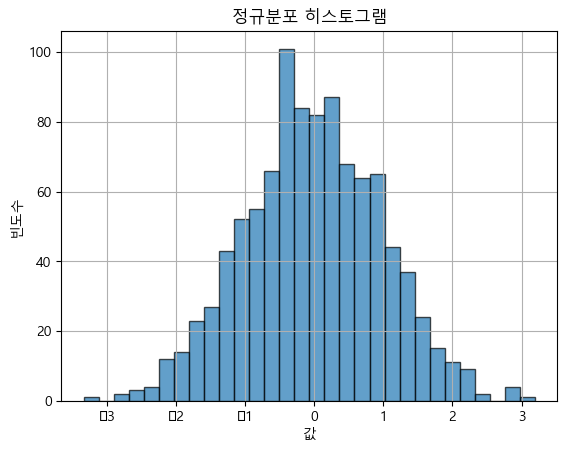

왜도 (Skewness): -0.0028
첨도 (Kurtosis): -0.0469


In [97]:


# 정규분포 데이터 생성 (평균=0, 표준편차=1, 1000개 샘플)
data = np.random.normal(loc=0, scale=1, size=1000)

# 데이터프레임으로 변환 (선택사항)
df = pd.DataFrame(data, columns=['값'])

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 정규분포 히스토그램 시각화
plt.hist(df['값'], bins=30, edgecolor='black', alpha=0.7)
plt.title('정규분포 히스토그램')
plt.xlabel('값')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

# 왜도(Skewness) 계산
skewness = skew(df['값'])
print(f"왜도 (Skewness): {skewness:.4f}")

# 첨도(Kurtosis) 계산
kurt = kurtosis(df['값']) # Fisher 방식 (정규분포면 0이 나옴)
print(f"첨도 (Kurtosis): {kurt:.4f}")

# 데이터 통합 및 시각화
- 데이터 통합 및 조인( merge, concat)
    - 여러 데이터셋을 하나로 합칠 때 사용.
    - 두 방법 모두 데이터를 합치는 기능이다.
    - 하지만 어떤 기준으로 데이터를 합치는지에 따라 사용방식이 달라짐.
    
    1. merge - 기준 열을 기반으로 데이터를 합치기(공통 열(key) 기준으로 합칠 수 있음.)
    
        - Inner Join(교집합) 공통된 값만 유지
        - Outer Join(합칩합) 공통된 값 없어도 nan 값을 채워서 유지
        
 
- 데이터 분포 확인 (히스토그램, 박스플롯)

- 데이터 탐색적 분석()

In [106]:
# 데이터의 병합

# 고객 정보 데이터프레임
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})
# 주문 정보 데이터프레임
orders = pd.DataFrame({
    'order_id': [101, 102, 103],
    'customer_id': [1, 2, 4],
    'product': ['Laptop', 'Tablet', 'Smartphone']
})
# 지금 동일한 키(customer_id)가 존재한다. 

#print(customers)
#print(orders)

In [109]:
result_1 = pd.merge(customers,orders, on='customer_id',how='inner')
print(result_1)
result_1

   customer_id   name  order_id product
0            1  Alice       101  Laptop
1            2    Bob       102  Tablet


,customer_id,name,order_id,product
0,1,Alice,101,Laptop
1,2,Bob,102,Tablet


In [ ]:
result_2 = pd.merge(customers, orders, on='customer_id',how='left')
print(result_2)

   customer_id     name  order_id product
0            1    Alice     101.0  Laptop
1            2      Bob     102.0  Tablet
2            3  Charlie       NaN     NaN


In [111]:
result_3 = pd.merge(customers, orders, on='customer_id',how='right')
print(result_3)

   customer_id   name  order_id     product
0            1  Alice       101      Laptop
1            2    Bob       102      Tablet
2            4    NaN       103  Smartphone


# merge와 concat 차이점



데이터 분포 확인

(히스토그램, 박스플롯)

- 박스플롯(Boxplot)

히스토그램과 박스플롯의 차이점


- 데이터 탐색적 분석(EDA)을 위한 시각화 기법
    - EDA는 데이터를 시각적으로 분석
    - 패턴 관계 이상치 분포 

id를 기준으로 
이 데이터 eda를 해봐라

어떤 칼럼과 관계가 있는지 

관계에 대한 처리를 그래프

성별, 나이, 수익, 소비점수에 영향을 줄 수 있는 ?

가설을 세우기